In [1]:
import pandas as pd 
import numpy as np 

In [2]:
dataset = pd.read_csv("apple_5yr_one.csv")

In [3]:
dataset

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400
...,...,...,...,...,...,...
1251,2025-05-27,200.2100067138672,200.74000549316406,197.42999267578125,198.3000030517578,56288500
1252,2025-05-28,200.4199981689453,202.72999572753906,199.89999389648438,200.58999633789062,45339700
1253,2025-05-29,199.9499969482422,203.80999755859375,198.50999450683594,203.5800018310547,51396800
1254,2025-05-30,200.85000610351562,201.9600067138672,196.77999877929688,199.3699951171875,70819900


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1255 non-null   object
 1   Close   1256 non-null   object
 2   High    1256 non-null   object
 3   Low     1256 non-null   object
 4   Open    1256 non-null   object
 5   Volume  1256 non-null   object
dtypes: object(6)
memory usage: 59.0+ KB


In [5]:
dataset.describe()

,Date,Close,High,Low,Open,Volume
count,1255,1256,1256,1256,1256,1256
unique,1255,1241,1256,1256,1256,1254
top,2020-06-04,142.5260467529297,AAPL,AAPL,AAPL,90956700
freq,1,2,1,1,1,2


In [6]:
dataset = dataset.dropna()

In [7]:
import matplotlib.pyplot as plt 

In [8]:
dataset.head() 

,Date,Close,High,Low,Open,Volume
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400
5,2020-06-10,85.74620819091797,86.21522971767824,84.1058417038533,84.54570234634012,166651600


In [9]:
print(dataset.dtypes)

Date      object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object


In [10]:
dataset.columns = dataset.columns.str.strip()

In [11]:
dataset.set_index("Date", inplace=True)
dataset.sort_index(inplace=True)

In [12]:
dataset.head() #this will avoid the date being  counted

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400
2020-06-10,85.74620819091797,86.21522971767824,84.1058417038533,84.54570234634012,166651600


In [13]:
for col in ["Open", "High", "Low", "Close", "Volume"]:
    if col in dataset.columns:
        dataset.loc[:, col] = pd.to_numeric(dataset[col], errors="coerce")
    else:
        print("Column not found")

In [14]:
dataset.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-04,78.329315,79.131269,77.955067,78.832363,87560400
2020-06-05,80.560219,80.620973,78.550469,78.57963,137250400
2020-06-08,81.036537,81.070563,79.544415,80.256454,95654400
2020-06-09,83.595505,83.989192,80.684163,80.715756,147712400
2020-06-10,85.746208,86.21523,84.105842,84.545702,166651600


<Axes: title={'center': 'Close'}, xlabel='Date'>

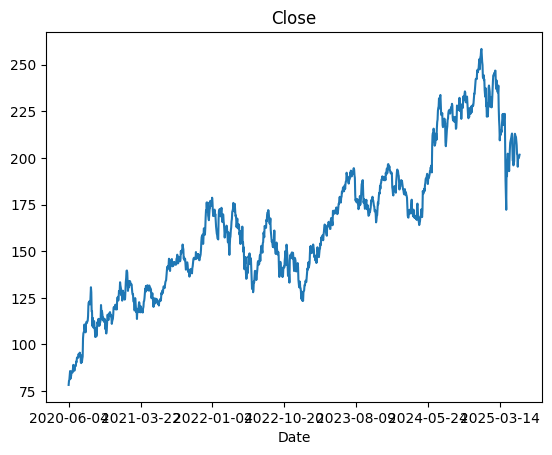

In [15]:
dataset['Close'].plot(title="Close")

In [17]:
dataset['Daily Return'] = dataset['Close'].pct_change()

C:\Users\soumy\AppData\Local\Temp\ipykernel_20644\1462534881.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Daily Return'] = dataset['Close'].pct_change()
C:\Users\soumy\AppData\Local\Temp\ipykernel_20644\1462534881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Daily Return'] = dataset['Close'].pct_change()


In [18]:
dataset.head()

,Close,High,Low,Open,Volume,Daily Return
Date,,,,,,
2020-06-04,78.329315,79.131269,77.955067,78.832363,87560400,NaN
2020-06-05,80.560219,80.620973,78.550469,78.57963,137250400,0.028481
2020-06-08,81.036537,81.070563,79.544415,80.256454,95654400,0.005913
2020-06-09,83.595505,83.989192,80.684163,80.715756,147712400,0.031578
2020-06-10,85.746208,86.21523,84.105842,84.545702,166651600,0.025728
